<a href="https://colab.research.google.com/github/yowich/ThermImageJ/blob/master/%5B%ED%83%90%EA%B5%AC10%5DRamdaCDM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 우주론(cosmology) 관련 그림들

* 이 노트북을 구글 코랩에서 실행하고자 한다면 [파일] - [드라이브에 사본 저장]을 하여 본인의 소유로 만든 후에 코드를 실행하거나 수정할 수 있습니다.

* 이 파일은 실제 수업에 사용하므로 필요에 따라 예고 없이 변경될 수 있습니다.

* If you have any questions or comments on this document, please email me(Kiehyun.Park@gmail.com).

* 이 파일(문서)는 공교육 현장에서 수업시간에 자유롭게 사용할 수 있으나, 다른 목적으로 사용할 시에는 사전에 연락을 주셔서 상의해 주시기 바랍니다.

## 필요한 환경

이 프로젝트를 위해서는 아래의 모듈이 필요합니다.

>


In [ ]:
import importlib, sys, subprocess
packages = "numpy, pandas, matplotlib, astropy, astroquery, version_information" # required modules
pkgs = packages.split(", ")
for pkg in pkgs :
    if not importlib.util.find_spec(pkg):
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', pkg, '-q'])
        print(f"**** {pkg} module is now being installed.")
    else:
        print(f"******** {pkg} module is already installed.")

******** numpy module is already installed.
******** matplotlib module is already installed.
******** astropy module is already installed.
******** ysfitsutilpy module is already installed.
******** ysphotutilpy module is already installed.
******** astroquery module is already installed.
******** version_information module is already installed.


### 구글 코랩에 한글 폰트 설치

matplotlib에서 한글을 사용하기 위해서는 한글 폰트가 필요합니다. 구글 코랩에서 현재의 Jupyter notebook을 실행한다면 아래 코드를 실행 한 후 런타임 다시 시작을 해 줘야 한글을 사용할 수 있습니다.

**이 수업에서는 한글을 사용하지 않고, 영어로 챠트를 그리겠습니다.**

In [ ]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

### 한글 폰트 사용

위에서 한글 폰트를 설치하고, 런타임 다시시작을 했다면 구글 코랩에서 폰트 경로를 설정하여 한글 사용이 가능해 집니다.

In [ ]:
# #visualization
# import matplotlib as mpl
# import matplotlib.pylab as plb
# import matplotlib.pyplot as plt

# # 브라우저에서 바로 그려지도록
# %matplotlib inline

# # 그래프에 retina display 적용
# %config InlineBackend.figure_format = 'retina'

# # Colab 의 한글 폰트 설정
# plt.rc('font', family='NanumBarunGothic')

# # 유니코드에서  음수 부호설정
# mpl.rc('axes', unicode_minus=False)

### 런타임 다시 시작

위의 셀을 실행한 다음 반드시 다음 과정을 잊지 말자.

* [메뉴]-[런타임]-[런터임 다시 시작]

* [메뉴]-[런타임]-[이전 셀 실행]을 해주어야 한다.

### 모듈 설치 및 버전 확인

아래 셀을 실행하면 이 노트북을 실행하는데 필요한 모듈을 설치하고 파이썬 및 관련 모듈의 버전을 확인할 수 있습니다.

In [ ]:
%load_ext version_information
import time
now = time.strftime("%Y-%m-%d %H:%M:%S (%Z = GMT%z)")
print(f"This notebook was generated at {now} ")

vv = %version_information {packages}
for i, pkg in enumerate(vv.packages):
    print(f"{i} {pkg[0]:10s} {pkg[1]:s}")

The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information
This notebook was generated at 2025-06-15 07:52:34 (UTC = GMT+0000) 
0 Python     3.11.13 64bit [GCC 11.4.0]
1 IPython    7.34.0
2 OS         Linux 6.1.123+ x86_64 with glibc2.35
3 numpy      2.0.2
4 matplotlib 3.10.0
5 astropy    7.1.0
6 ysfitsutilpy 0.2
7 ysphotutilpy 0.1.1
8 astroquery 0.4.10
9 version_information 1.0.4


## astropy.cosmology
`astropy.cosmology`는 Python 라이브러리인 Astropy의 서브패키지로, 우주론적 모델을 정의하고 다양한 우주론적 양(예: 우주 나이, 거리, 밀도, 허블 상수 등)을 계산하는 데 사용됩니다.

## 주요 특징

- **우주론 모델 지원**
  - 다양한 ΛCDM 우주론 모델을 지원하며, 주요 우주론 매개변수(허블 상수 $H_0$, 물질 밀도 매개변수 $\Omega_m$, 암흑에너지 밀도 매개변수 $\Omega_\Lambda$ 등)를 입력할 수 있습니다.
  - WMAP, Planck 등 주요 우주론 실험 결과를 바탕으로 한 사전 정의된 모델(예: `WMAP9`, `Planck13`)도 제공합니다.
- **계산 기능**
  - **우주 나이(age)**: 주어진 적색편이(redshift)에서의 우주 나이를 계산합니다.
  - **거리 계산**: 공동거리(comoving distance), 광도거리(luminosity distance), 각거리(angular diameter distance) 등 다양한 우주론적 거리를 계산할 수 있습니다.
  - **밀도 및 기타 물리량**: 임계밀도(critical density), 물질 밀도, 암흑에너지 밀도 등도 계산 가능합니다.
- **배열 입력 지원**
  - 적색편이 배열을 입력하면 여러 값에 대해 한 번에 계산할 수 있습니다.
- **단위(units) 지원**
  - Astropy의 단위 시스템과 통합되어, 계산 결과에 단위(예: Mpc, Gyr, km/s/Mpc 등)가 자동으로 붙습니다.



## 허블 시간과 우주의 나이

허블 시간은 현재의 팽창 속도($H_0$)만을 사용한 단순 모델입니다.
하지만 실제 우주는 시간에 따라 팽창 속도가 변해왔습니다. 초기에는 복사와 물질의 영향으로 팽창 속도가 느려지다가, 최근에는 암흑 에너지의 영향으로 다시 팽창 속도가 빨라지고 있습니다 (가속 팽창).
우주의 나이는 이러한 팽창 속도의 변화를 모두 적분하여 계산하므로, 단순한 허블 시간과는 다른 값을 가지게 됩니다.

* 허블 시간 (Hubble Time): 허블 상수의 역수로 현재 우주가 일정한 속도로 팽창한다고 가정했을 때, 우주의 크기가 두 배가 되는 데 걸리는 시간입니다. 이는 이상적인 상황에서의 팽창 시간을 나타냅니다.

* 우주의 나이 (Age of the Universe): 빅뱅 이후 현재까지 실제로 경과한 물리적인 시간입니다. 이는 우주를 구성하는 물질, 복사, 암흑 에너지 등 다양한 요소의 밀도와 그에 따른 팽창 속도의 변화를 모두 고려하여 계산됩니다.

In [ ]:
from astropy.cosmology import WMAP9 as cosmo

# 허블 상수 계산 (z=0)
print(cosmo.H(0))  #

# 우주 나이 계산 (z=0)
print(cosmo.age(0))  #

# 공동거리 계산 (여러 적색편이)
import numpy as np
print(cosmo.comoving_distance(np.array([0.5, 1.0, 1.5])))

# 허블 시간 계산
hubble_time = cosmo.hubble_time
print(f"허블 시간: {hubble_time}")

# 허블 길이 계산
hubble_length = cosmo.hubble_distance
print(f"허블 길이: {hubble_length}")

69.32 km / (Mpc s)
13.768899116929322 Gyr
[1916.06941724 3363.07062107 4451.7475201 ] Mpc
허블 시간: 14.105485021361647 Gyr
허블 길이: 4324.761367570687 Mpc


In [ ]:
from astropy.cosmology import Planck18 as cosmo
import astropy.units as u
import numpy as np

# 허블 상수 계산 (z=0)
print(cosmo.H(0))

# 우주 나이 계산 (z=0)
print(cosmo.age(0))

# 공동거리 계산 (여러 적색편이)
print(cosmo.comoving_distance(np.array([0.5, 1.0, 1.5])))

# 허블 시간 계산
hubble_time = cosmo.hubble_time
print(f"허블 시간: {hubble_time}")

# 허블 길이 계산
hubble_length = cosmo.hubble_distance
print(f"허블 길이: {hubble_length}")

67.66 km / (Mpc s)
13.786885302009708 Gyr
[1946.41663479 3395.63447115 4477.19790652] Mpc
허블 시간: 14.451555153425796 Gyr
허블 길이: 4430.866952409105 Mpc


### FlatLambdaCDM과 LambdaCDM의 차이

**FlatLambdaCDM**와 **LambdaCDM**는 모두 Astropy에서 제공하는 대표적인 ΛCDM(람다 콜드 다크 매터) 우주론 모델 클래스입니다. 두 클래스의 가장 큰 차이는 "우주의 곡률"에 대한 가정에 있습니다.

- **FlatLambdaCDM**  
  - 우주는 반드시 평평하다고 가정합니다(즉, $Ω_k = 0$).
  - 암흑에너지 밀도($\Omega_\Lambda$, Ode0)는 자동으로 $ 1 - \Omega_m $ (필요시 + 기타 성분)로 계산됩니다.
  - 따라서 허블 상수($H_0$, H0), 물질 밀도($\Omega_m$, Om0)만 직접 지정하면 됩니다.
  - 곡률을 따로 지정할 수 없습니다.

- **LambdaCDM**  
  - 우주의 곡률이 0이 아닐 수도 있다는 일반적인 $\Lambda CDM$ 모델입니다.
  - 허블 상수($H_0$, H0), 물질 밀도($\Omega_m$, Om0),  암흑에너지 밀도($\Omega_\Lambda$, Ode0)을 모두 직접 지정해야 하며, 곡률($\Omega_k$)은 이 값들로부터 자동으로 계산됩니다.
  - 평평한 우주뿐만 아니라 열린/닫힌 우주도 표현할 수 있습니다.


In [ ]:
### 예시 코드

from astropy.cosmology import FlatLambdaCDM, LambdaCDM
import astropy.units as u

Hubble_const = 67.8 * u.km/u.s/u.Mpc

# FlatLambdaCDM 모형 (우주는 편평하며 곡률이 0)
cosmo_flat = FlatLambdaCDM(H0=Hubble_const, Om0=0.3)
print(f"허블 상수가 {Hubble_const}일 때의 FlatLambdaCDM 모형에 의한 우주의 나이 {cosmo_flat.age(0)}")

# LambdaCDM 모형
cosmo_nonflat = LambdaCDM(H0=Hubble_const, Om0=0.3, Ode0=0.7)
print(f"허블 상수가 {Hubble_const}일 때의 LambdaCDM 모형에 의한 우주의 나이 {cosmo_nonflat.age(0)}")

허블 상수가 67.8 km / (Mpc s)일 때의 FlatLambdaCDM 모형에 의한 우주의 나이 13.903965727055036 Gyr
허블 상수가 67.8 km / (Mpc s)일 때의 LambdaCDM 모형에 의한 우주의 나이 13.903965727055036 Gyr


아래 두 그림을 비교하면 **LambdaCDM**으로 **FlatLambdaCDM**과 같은 그림을 그릴 수 있다는 것을 알 수 있습니다. 따라서 앞으로는 **LambdaCDM**만 사용하겠습니다.

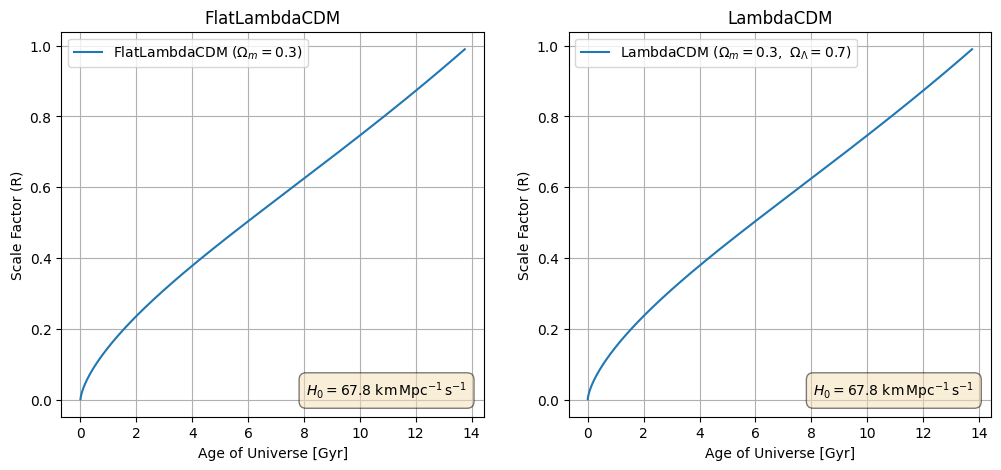

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import FlatLambdaCDM, LambdaCDM
import astropy.units as u

# 허블 상수(H0) 설정 (우주의 팽창 속도)
# astropy.units를 사용하여 단위를 명확히 지정합니다.
Hubble_const = 67.8 * u.km/u.s/u.Mpc

# 물질 밀도 매개변수(Ωm) 설정 (일반 물질 + 암흑 물질)
Omega_m = 0.3

# 암흑 에너지 밀도 매개변수(ΩΛ) 설정
Omega_Lambda = 0.7

# FlatLambdaCDM 우주 모형 설정 (평탄한 우주 가정, Ωk=0)
# H0와 Om0만 입력하면 Ode0는 자동으로 1 - Om0으로 설정됨 (즉, ΩΛ=1-Ωm)
cosmo_flat = FlatLambdaCDM(H0=Hubble_const, Om0=Omega_m)

# LambdaCDM 우주 모형 설정 (일반적인 ΛCDM 모델, 곡률 Ωk≠0 가능)
# H0, Om0, Ode0(ΩΛ)를 직접 입력함. Tcmb0, Neff는 옵션(우주론 계산에 영향)
cosmo_lambda = LambdaCDM(H0=Hubble_const,
                         Om0=Omega_m,         # 물질 밀도
                         Ode0=Omega_Lambda,   # 암흑 에너지 밀도
                         Tcmb0=2.725,         # CMB 온도 (K)
                         Neff=3.046)          # 유효 중성미자 종수

# 적색편이(redshift, z) 범위 설정
# logz는 log10(z) 값, z는 실제 적색편이 값 (10^3 ~ 10^-2)
logz = np.arange(3, -2, -0.01)  # log10(1000)=3, log10(0.01)=-2
z = 10**logz

# 각 적색편이에 해당하는 우주 나이(age)와 스케일 팩터(scale factor) 계산
# age(): 해당 z에서의 우주 나이(Gyr), scale_factor(): 스케일 팩터(현재=1)
age_flat = cosmo_flat.age(z)
age_lambda = cosmo_lambda.age(z)
scale_flat = cosmo_flat.scale_factor(z)
scale_lambda = cosmo_lambda.scale_factor(z)

# 그래프 그리기 위한 설정 (1행 2열의 서브플롯)
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# 첫 번째 서브플롯 (axs[0]): FlatLambdaCDM 모델의 우주 나이-스케일 팩터 그래프
axs[0].plot(age_flat, scale_flat, label=f'FlatLambdaCDM ($\Omega_m = {Omega_m}$)')
axs[0].set_xlabel('Age of Universe [Gyr]')      # x축: 우주 나이(십억 년)
axs[0].set_ylabel('Scale Factor (R)')           # y축: 스케일 팩터(상대적 우주 크기)
axs[0].set_title(f'FlatLambdaCDM')              # 그래프 제목
axs[0].grid(True)                               # 격자 표시
axs[0].legend()                                 # 범례 표시
# 오른쪽 하단에 허블 상수 정보 표시
axs[0].text(0.96, 0.04, f'$H_0 = {Hubble_const.value}$ {Hubble_const.unit:latex_inline}',
            ha='right', va='bottom', fontsize=10,
            bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5),
            transform=axs[0].transAxes)

# 두 번째 서브플롯 (axs[1]): LambdaCDM(ΩΛ=0.7) 모델의 우주 나이-스케일 팩터 그래프
axs[1].plot(age_lambda, scale_lambda, label=f'LambdaCDM ($\Omega_m = {Omega_m},~\Omega_\Lambda = {Omega_Lambda}$)')
axs[1].set_xlabel('Age of Universe [Gyr]')      # x축: 우주 나이(십억 년)
axs[1].set_ylabel('Scale Factor (R)')           # y축: 스케일 팩터(상대적 우주 크기)
axs[1].set_title('LambdaCDM')                   # 그래프 제목
axs[1].grid(True)                               # 격자 표시
axs[1].legend()                                 # 범례 표시
# 오른쪽 하단에 허블 상수 정보 표시
axs[1].text(0.96, 0.04, f'$H_0 = {Hubble_const.value}$ {Hubble_const.unit:latex_inline}',
            ha='right', va='bottom', fontsize=10,
            bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5),
            transform=axs[1].transAxes)

# 그래프 표시
plt.show()

## 허블 텐션(Hubble tension)
허블 텐션은 허블 상수($H_0$)의 측정값이 서로 다름을 의미합니다. 즉, 초기 우주(플랑크 위성 등, $H_0 \approx 67.4 \rm{~km/s/Mpc}$)와 근거리 우주(초신성 등, $H_0 \approx 73 \rm{~km/s/Mpc}$)에서 측정된 허블 상수가 일치하지 않는 현상입니다.

* **두 개의 $H_0$ 값($67.8,~73 \rm{~km/s/Mpc}$)**을 각각 사용하여 LambdaCDM 우주론으로 계산한 후
* x축은 "현재로부터의 시간(십억 년)", y축은 "스케일 팩터(우주 크기)"로 그래프를 그려 보면
* $H_0$가 큰 경우가($73\rm{~km/s/Mpc}$), 같은 시간 동안 우주가 더 빨리 팽창하여 스케일 팩터가 더 빠르게 증가하고, 우주의 나이가 더 적게 나타나는 것을 알 수 있음.

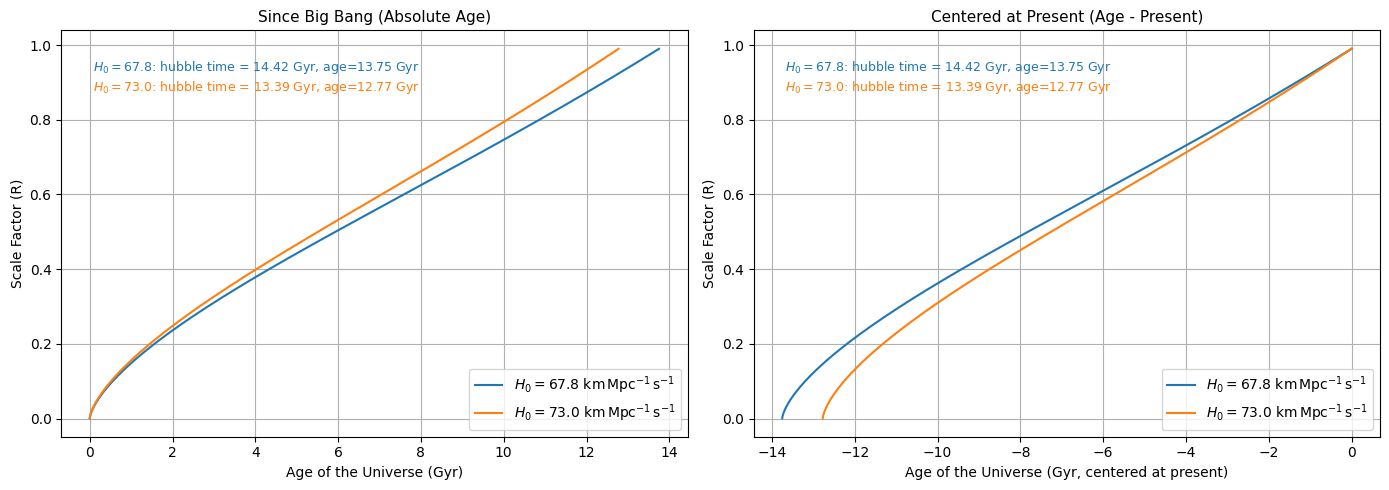

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import LambdaCDM
import astropy.units as u

# 허블 상수(H0) 값 리스트 정의 (Planck 측정값과 근거리 측정값)
H0_values = [67.8, 73] * u.km/u.s/u.Mpc

# 물질 밀도 매개변수(Ωm) 설정
Omega_m = 0.3

# 암흑 에너지 밀도 매개변수(ΩΛ) 설정
Omega_Lambda = 0.7

# 적색편이(z) 범위 설정
logz = np.arange(3, -2, -0.01)
z = 10**logz

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

for idx, Hubble_const in enumerate(H0_values):
    cosmo = LambdaCDM(H0=Hubble_const,
                      Om0=Omega_m,
                      Ode0=Omega_Lambda,
                      Tcmb0=2.725,
                      Neff=3.046)
    age = cosmo.age(z)
    scale_factor = cosmo.scale_factor(z)
    # 첫 번째 그래프: 시간축을 빅뱅 이후 경과 시간으로 (순서 바꿈)
    axs[0].plot(age, scale_factor, label=f'$H_0 = {Hubble_const.value}$ {Hubble_const.unit:latex_inline}')
    axs[0].text(0.05, 0.9 - 0.05*idx,
                f'$H_0={Hubble_const.value}$: hubble time = {cosmo.hubble_time:.2f}, age={age[-1]:.2f}',
                transform=axs[0].transAxes, fontsize=9,
                color=axs[0].lines[-1].get_color())

    # 두 번째 그래프: 시간축을 현재로부터의 시간으로 (순서 바꿈)
    axs[1].plot(age - age[-1], scale_factor, label=f'$H_0 = {Hubble_const.value}$ {Hubble_const.unit:latex_inline}')
    axs[1].text(0.05, 0.9 - 0.05*idx,
                f'$H_0={Hubble_const.value}$: hubble time = {cosmo.hubble_time:.2f}, age={age[-1]:.2f}',
                transform=axs[1].transAxes, fontsize=9,
                color=axs[1].lines[-1].get_color())

axs[0].set_xlabel('Age of the Universe (Gyr)', fontsize=10)
axs[0].set_ylabel('Scale Factor (R)', fontsize=10)
axs[0].set_title('Since Big Bang (Absolute Age)', fontsize=11)
axs[0].legend()
axs[0].grid(True)

axs[1].set_xlabel('Age of the Universe (Gyr, centered at present)', fontsize=10)
axs[1].set_ylabel('Scale Factor (R)', fontsize=10)
axs[1].set_title('Centered at Present (Age - Present)', fontsize=11)
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

## 가시 우주(observable universe)

가시 우주 반경(particle horizon)은 아래와 같이 계산할 수 있습니다.
astropy.cosmology는 직접적으로 가시 우주 반경을 반환하는 함수는 제공하지 않아서 적분을 해야 하지만 공동 거리로 사용해도 큰 차이는 없습니다.

공동 거리(Comoving Distance)는 우주의 팽창 효과를 제거하고 측정한 거리입니다. 마치 우주 공간 자체가 팽창하지 않는다고 가정했을 때의 두 지점 사이의 거리라고 생각할 수 있습니다.

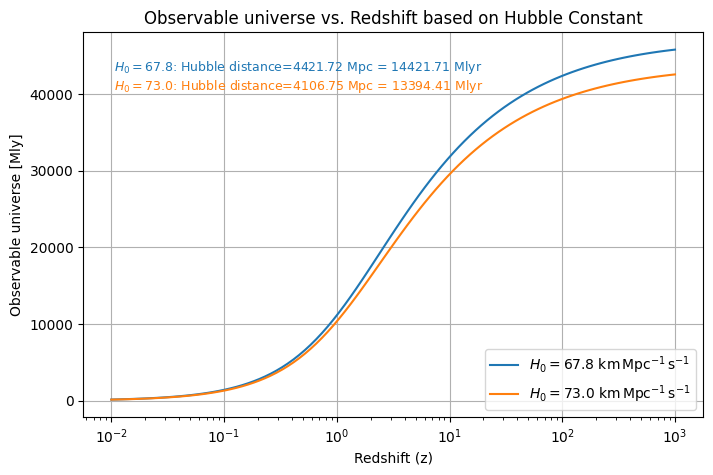

In [ ]:
from astropy.cosmology import LambdaCDM
import astropy.units as u
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

# 허블 상수(H0) 값 리스트 정의 (Planck 측정값과 근거리 측정값)
# 각각 67.8, 73 km/s/Mpc로, 허블 텐션 문제를 시각적으로 비교할 수 있음
H0_values = [67.8, 73] * u.km/u.s/u.Mpc  # astropy 단위로 명확히 지정

# 물질 밀도 매개변수(Ωm) 설정 (일반 물질 + 암흑 물질)
Omega_m = 0.3

# 암흑 에너지 밀도 매개변수(ΩΛ) 설정
Omega_Lambda = 0.7

# 가시 우주 반경(particle horizon) 계산 함수
def particle_horizon(z):
    # 실제로는 적분을 통해 계산해야 하지만,
    # astropy의 comoving_distance(z)를 대체로 사용 (정확한 particle horizon은 아님)
    # comoving_distance(z)는 현재 관측자와 z까지의 동행 거리를 반환
    return cosmo.comoving_distance(z)

# 적색편이(z) 배열 생성: z=0.01 ~ 1000 (log 스케일)
z = np.logspace(-2, 3, 100)

plt.figure(figsize=(8, 5))
for idx, Hubble_const in enumerate(H0_values):
    # 각 허블 상수에 대해 LambdaCDM 우주 모형 생성
    cosmo = LambdaCDM(H0=Hubble_const,
                      Om0=Omega_m,         # 물질 밀도
                      Ode0=Omega_Lambda,   # 암흑 에너지 밀도
                      Tcmb0=2.725,         # CMB 온도 (K)
                      Neff=3.046)          # 유효 중성미자 종수

    # 그래프에 플롯 (x축: 적색편이, y축: 동행 거리)
    plt.semilogx(z, cosmo.comoving_distance(z).to(u.Mlyr).value, label=f'$H_0={Hubble_const.value}$ {Hubble_const.unit:latex_inline}')
    # horizon_values[-1] 값을 그래프 위에 텍스트로 출력
    plt.text(0.05, 0.9 - 0.05*idx,
             f'$H_0={Hubble_const.value}$: Hubble distance={cosmo.hubble_distance:.2f} = {cosmo.hubble_distance.to(u.Mlyr):.2f}',
             transform=plt.gca().transAxes, fontsize=9, color=plt.gca().lines[-1].get_color())

plt.xlabel('Redshift (z)', fontsize=10)   # x축: 적색편이(z, 로그 스케일)
plt.ylabel('Observable universe [Mly]', fontsize=10)  # y축: 동행 거리(가시 우주 반경 근사, Mpc)
plt.title('Observable universe vs. Redshift based on Hubble Constant', fontsize=12)   # 그래프 제목

plt.legend(loc="lower right") # 범례 표시
plt.grid(True) # 격자 표시
plt.show() # 그래프 출력

## TypeIa 초신성 관측 자료

실제 Type Ia 초신성 거리 모듈러스 데이터(예: SCP, Union2.1, Pantheon 등)는 논문이나 공개된 천문 데이터베이스에서 구할 수 있습니다. 우리는 Union2.1 자료를 다운받을 수 있습니다. (https://supernova.lbl.gov/union/)

아래 셀에서는 구글 드라이브에 미리 받아둔 자료를 이용하겠습니다.

In [ ]:
import pandas as pd # 데이터 처리를 위한 pandas 라이브러리 임포트

# 데이터를 다운로드할 파일의 URL 정의
# Google Drive에서 공유된 파일의 다운로드 링크입니다.
url = "https://drive.google.com/uc?export=download&id=18atom_FXknWZbXJGBRFoCcnIM8cGbow9"

# wget 명령어를 사용하여 URL에서 파일 다운로드
# !: 코랩에서 쉘(Shell) 명령어를 실행할 때 사용합니다.
# wget: 웹에서 파일을 다운로드하는 명령어입니다.
# -O data.txt: 다운로드한 파일을 'data.txt'라는 이름으로 저장하도록 지정합니다.
# "{url}": 위에서 정의한 url 변수의 값을 wget 명령어에 인자로 전달합니다. 큰따옴표로 묶어 URL에 공백이나 특수 문자가 있어도 제대로 처리되게 합니다.
!wget -O data.txt "{url}"

# 다운로드한 data.txt 파일을 pandas DataFrame으로 읽어오기
# pd.read_csv(): CSV 형식의 파일을 읽어와 DataFrame으로 만듭니다.
# 'data.txt': 읽어올 파일의 이름입니다.
# sep='\t': 데이터가 탭(\t)으로 구분되어 있음을 지정합니다.
# skiprows=1: 파일의 첫 번째 줄(헤더나 설명 등)을 건너뛰고 데이터를 읽도록 지정합니다.
# names=['name', 'z', 'mu', 'mu_err1', 'mu_err2']: DataFrame의 열(column) 이름을 지정합니다.
# 'name': 초신성 이름, 'z': 적색편이, 'mu': 거리 모듈러스, 'mu_err1', 'mu_err2': 거리 모듈러스의 오차
df = pd.read_csv('data.txt', sep='\t', skiprows=1, names=['name', 'z', 'mu', 'mu_err1', 'mu_err2'])

# DataFrame의 처음 5개 행을 출력하여 데이터가 제대로 로드되었는지 확인
print(df.head())

--2025-06-15 07:52:36--  https://drive.google.com/uc?export=download&id=18atom_FXknWZbXJGBRFoCcnIM8cGbow9
Resolving drive.google.com (drive.google.com)... 142.251.183.138, 142.251.183.102, 142.251.183.100, ...
Connecting to drive.google.com (drive.google.com)|142.251.183.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=18atom_FXknWZbXJGBRFoCcnIM8cGbow9&export=download [following]
--2025-06-15 07:52:36--  https://drive.usercontent.google.com/download?id=18atom_FXknWZbXJGBRFoCcnIM8cGbow9&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 108.177.121.132, 2607:f8b0:4001:c19::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|108.177.121.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33742 (33K) [application/octet-stream]
Saving to: ‘data.txt’

data.txt            100%[===================>]  32.95K  --.-KB/s   

이를 이용해 다음과 같이 그림을 그려볼 수 있습니다.

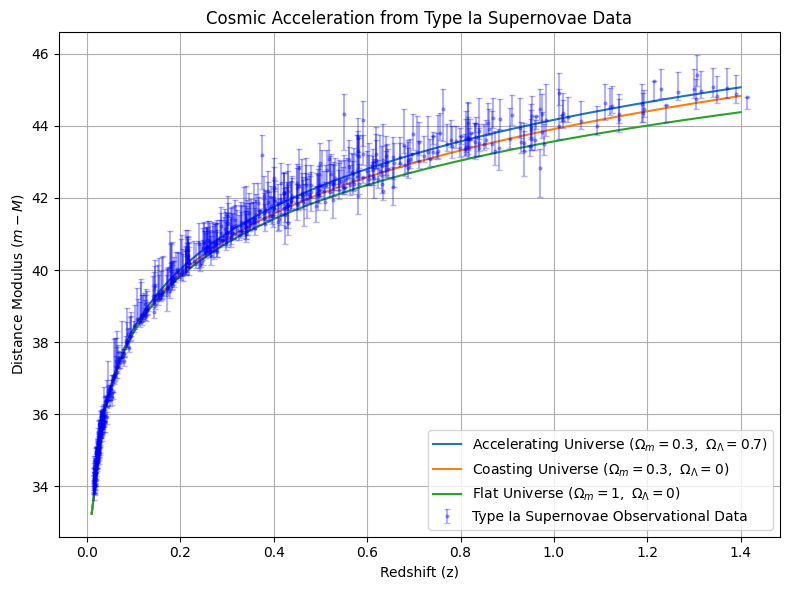

In [ ]:
import numpy as np # 과학 계산을 위한 numpy 라이브트러리 임포트
import matplotlib.pyplot as plt # 그래프를 그리기 위한 matplotlib.pyplot 모듈 임포트
from astropy.cosmology import FlatLambdaCDM, LambdaCDM # 우주론 계산을 위한 astropy.cosmology의 FlatLambdaCDM, LambdaCDM 모델 임포트
import astropy.units as u # astropy 단위 시스템 임포트
import pandas as pd # 데이터를 다루기 위한 pandas 라이브러리 임포트 (df 사용)

# 우주론적 변수 정의
# 허블 상수(H0) 설정 (우주의 팽창 속도)
# astropy.units를 사용하여 단위를 명확히 지정합니다. km/s/Mpc 단위 사용
hubble_const=67.8 * u.km/u.s/u.Mpc

# 비교할 우주론적 모델들을 리스트 형태로 정의
# 각 모델은 딕셔너리로 표현되며, 레이블과 물질/암흑 에너지 밀도 매개변수(Om0, Ode0)를 포함
models = [
    {"label": "Accelerating Universe", "Om0": 0.3, "Ode0": 0.7}, # 가속 팽창 우주 (현재 표준 ΛCDM 모델)
    {"label": "Coasting Universe", "Om0": 0.3, "Ode0": 0},      # 암흑 에너지가 없는 우주 (물질만 고려)
    {"label": "Flat Universe", "Om0": 1, "Ode0": 0},          # 평탄하고 물질로만 이루어진 우주
]

# 적색편이(z) 범위 설정
# np.linspace(start, stop, num): start부터 stop까지 num개의 등간격 값을 생성
# 여기서는 0.01부터 1.4까지 50개의 적색편이 값을 생성하여 이론적인 곡선을 그리는 데 사용
z = np.linspace(0.01, 1.4, 50)


# 그래프 그리기 설정
plt.figure(figsize=(8,6)) # 그래프의 크기 설정 (가로 8인치, 세로 6인치)

# 에러바(불확도) 표시: mu_err1, mu_err2 모두 사용 (양방향 에러바)
# df는 이전 셀에서 로드된 Type Ia 초신성 관측 데이터 DataFrame
yerr = np.vstack([df["mu_err1"], df["mu_err2"]]) # yerr는 각 데이터 포인트의 상한 및 하한 오차 값으로 구성된 배열
plt.errorbar(df["z"], df["mu"], yerr=yerr, fmt='o', color='blue',
             label='Type Ia Supernovae Observational Data', zorder=5, markersize=2, capsize=2, alpha=0.3)
# plt.errorbar(): 데이터 포인트와 그 불확도를 막대 형태로 표시
# df["z"]: 초신성 데이터의 적색편이 값 (x축)
# df["mu"]: 초신성 데이터의 거리 모듈러스 값 (y축)
# yerr: y축 값의 오차 (mu_err1, mu_err2 사용)
# fmt='o': 데이터 포인트를 원형 마커로 표시
# color='blue': 마커 색상을 파란색으로 설정
# label: 범례에 표시될 데이터 이름
# zorder=5: 다른 선 그래프들 위에 표시되도록 z축 순서를 높게 설정
# markersize=2: 마커 크기 설정
# capsize=2: 에러 바 끝 부분의 캡 크기 설정
# alpha=0.3: 마커 투명도 설정

# 모델별 거리 모듈러스 계산 및 그래프 그리기
for model in models :
    # LambdaCDM 우주 모형 생성
    # H0: 허블 상수, Om0: 물질 밀도, Ode0: 암흑 에너지 밀도
    # Tcmb0, Neff: CMB 온도 및 유효 중성미자 종수 (정확한 계산을 위해 사용, 기본값 사용)
    cosmo = LambdaCDM(H0=hubble_const, Om0=model["Om0"], Ode0=model["Ode0"], Tcmb0=2.725, Neff=3.046)
    # 거리 모듈러스 계산: 주어진 적색편이(z) 배열에 대해 해당 모델의 거리 모듈러스 계산
    mu = cosmo.distmod(z)
    # 계산된 거리 모듈러스 곡선 플롯
    # plt.plot(x, y, ...): 선 그래프를 그림
    # label: 범례에 표시될 모델 이름과 매개변수 값 (LaTeX 형식으로 표시)
    plt.plot(
            z, mu,
            label=f'{model["label"]} ($\\Omega_m = {model["Om0"]},~\\Omega_\\Lambda = {model["Ode0"]}$)'
        )

# 그래프 레이블 및 제목 설정
plt.xlabel('Redshift (z)')   # x축 레이블 설정
plt.ylabel('Distance Modulus $(m-M)$') # y축 레이블 설정
plt.title('Cosmic Acceleration from Type Ia Supernovae Data') # 그래프 제목 설정

# 범례, 격자, 레이아웃 설정 및 그래프 표시
plt.legend()       # 범례 표시 (plt.plot, plt.errorbar에서 label로 설정된 내용 사용)
plt.grid(True)       # 그래프에 격자 표시
plt.tight_layout() # 그래프 요소들이 겹치지 않도록 레이아웃 자동 조정
plt.show()         # 최종적으로 그래프 출력

아래쪽에 편차 그래프로 추가해 보겠습니다.

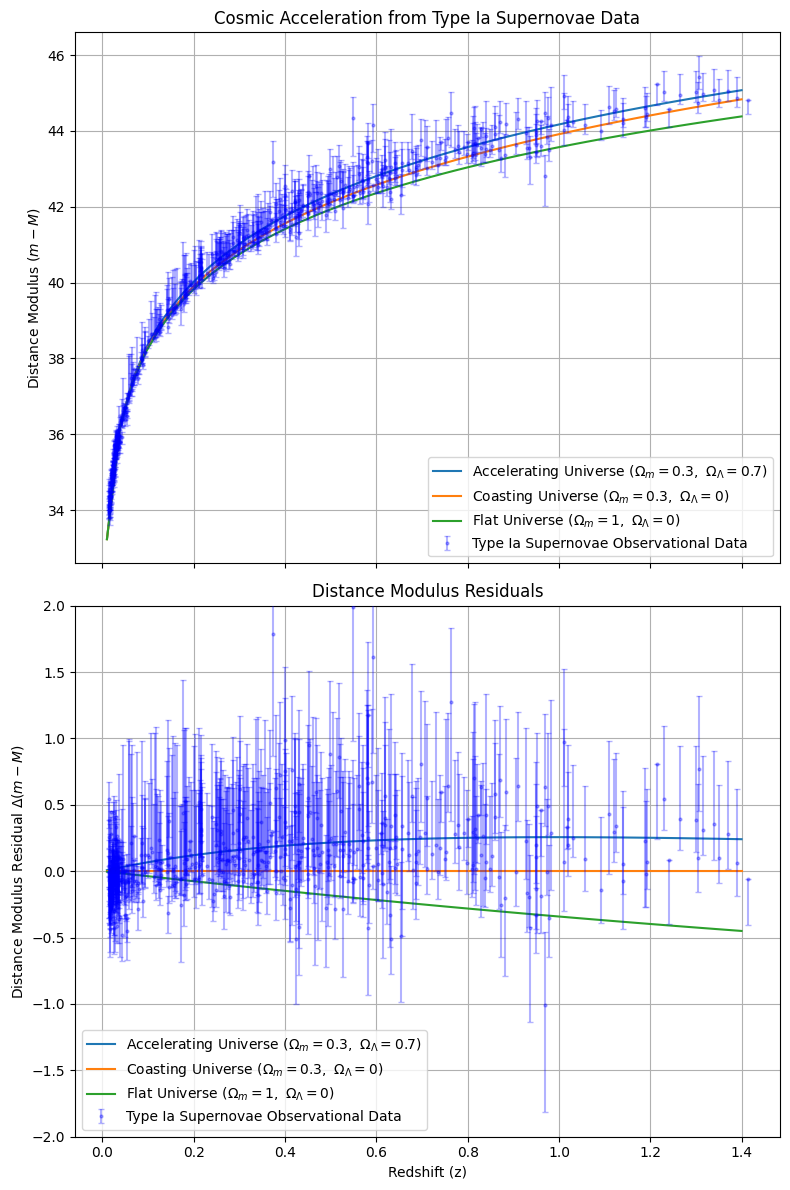

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import LambdaCDM
import astropy.units as u
import pandas as pd

# 허블 상수 및 모델 정의
hubble_const = 67.8 * u.km/u.s/u.Mpc
models = [
    {"label": "Accelerating Universe", "Om0": 0.3, "Ode0": 0.7},
    {"label": "Coasting Universe", "Om0": 0.3, "Ode0": 0},
    {"label": "Flat Universe", "Om0": 1, "Ode0": 0},
]

z = np.linspace(0.01, 1.4, 50)

# 기준 모델(Residual 계산용)
model0 = {"label": "Coasting Universe", "Om0": 0.3, "Ode0": 0}
cosmo0 = LambdaCDM(H0=hubble_const, Om0=model0["Om0"], Ode0=model0["Ode0"], Tcmb0=2.725, Neff=3.046)
mu0_grid = cosmo0.distmod(z)  # 이론 곡선용
mu0_data = cosmo0.distmod(df["z"]).value  # 실제 데이터 포인트용

fig, axs = plt.subplots(2, 1, figsize=(8, 12), sharex=True)


# 1. 거리 모듈러스 그래프
yerr = np.vstack([df["mu_err1"], df["mu_err2"]])
axs[0].errorbar(df["z"], df["mu"], yerr=yerr, fmt='o', color='blue',
                label='Type Ia Supernovae Observational Data', zorder=5, markersize=2, capsize=2, alpha=0.3)
for model in models:
    cosmo = LambdaCDM(H0=hubble_const, Om0=model["Om0"], Ode0=model["Ode0"], Tcmb0=2.725, Neff=3.046)
    mu = cosmo.distmod(z)
    axs[0].plot(z, mu, label=f'{model["label"]} ($\\Omega_m={model["Om0"]},~\\Omega_\\Lambda={model["Ode0"]}$)')
axs[0].set_ylabel('Distance Modulus $(m-M)$')
axs[0].set_title('Cosmic Acceleration from Type Ia Supernovae Data')
axs[0].legend()
axs[0].grid(True)

# 2. Residual 그래프 (수정)
axs[1].errorbar(
    df["z"],
    df["mu"] - mu0_data,  # 각 데이터 z에 맞는 기준 모델 값 빼기
    yerr=np.vstack([df["mu_err1"], df["mu_err2"]]),
    fmt='o', color='blue',
    label='Type Ia Supernovae Observational Data',
    zorder=5, markersize=2, capsize=2, alpha=0.3
)
for model in models:
    cosmo = LambdaCDM(H0=hubble_const, Om0=model["Om0"], Ode0=model["Ode0"], Tcmb0=2.725, Neff=3.046)
    mu = cosmo.distmod(z)
    axs[1].plot(z, mu - mu0_grid, label=f'{model["label"]} ($\\Omega_m={model["Om0"]},~\\Omega_\\Lambda={model["Ode0"]}$)')
axs[1].set_xlabel('Redshift (z)')
axs[1].set_ylabel(r'Distance Modulus Residual $\Delta(m-M)$')
axs[1].set_ylim([-2, 2])
axs[1].set_title('Distance Modulus Residuals')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

## 표준 우주 모형

 물질 밀도 매개변수 $\Omega_m$, 암흑에너지 밀도 매개변수 $\Omega_\Lambda$ 에 따른 척도인자 변화를 확인해 보겠습니다.

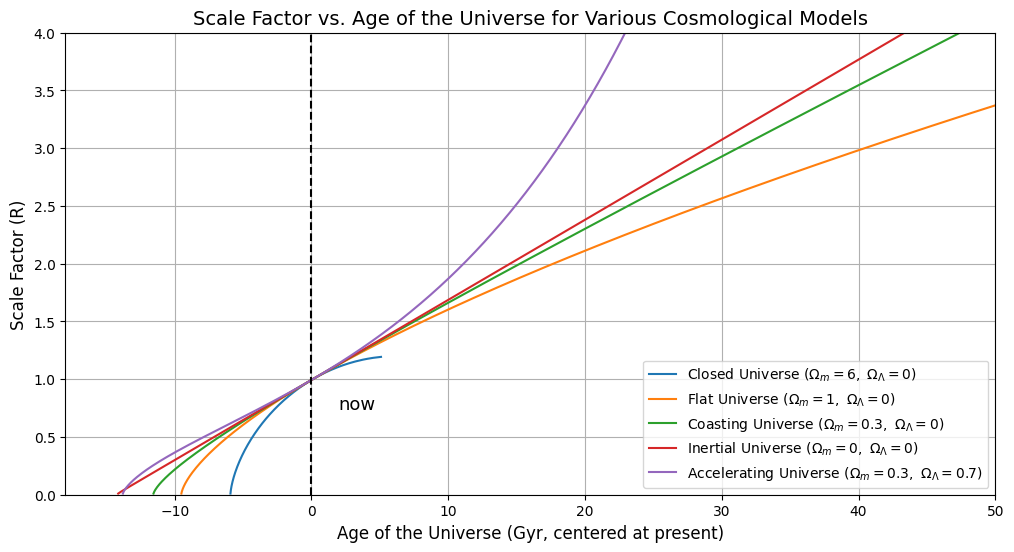

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import LambdaCDM
import astropy.units as u
import warnings
warnings.filterwarnings('ignore')

def plot_cosmological_models(
    hubble_const=67.8 * u.km/u.s/u.Mpc,
    age_universe=13.798,
    z_min=0.01,
    z_max=4,
    num_points=500
):
    # 우주론적 변수 정의
    # 여러 우주론적 모델(닫힌 우주, 평탄한 우주, 관성 우주, 가속 우주 등)을 리스트로 정의
    models = [
        {"label": "Closed Universe", "Om0": 6, "Ode0": 0},         # 닫힌 우주 (물질 밀도 큼, 암흑에너지 없음)
        {"label": "Flat Universe", "Om0": 1, "Ode0": 0},           # 평탄한 우주 (물질만, 암흑에너지 없음)
        {"label": "Coasting Universe", "Om0": 0.3, "Ode0": 0},     # 팽창만 하는 우주 (물질 적음, 암흑에너지 없음)
        {"label": "Inertial Universe", "Om0": 0, "Ode0": 0},       # 완전 관성 우주 (물질, 암흑에너지 모두 없음)
        {"label": "Accelerating Universe", "Om0": 0.3, "Ode0": 0.7}, # 가속 팽창 우주 (현재 표준모형)
    ]
    # z_min ~ z_max 구간을 num_points 개수로 나눠서 z(적색편이) 배열 생성
    # 1/x - 1 형태로 변환하여 scale factor가 0~1에 고르게 분포하도록 함
    z_lst = 1/np.linspace(z_min, z_max, num_points) - 1

    results = []
    for m in models:
        # 각 모델별 LambdaCDM 우주론 객체 생성
        cosmo = LambdaCDM(H0=hubble_const, Om0=m["Om0"], Ode0=m["Ode0"], Tcmb0=2.725, Neff=3.046)
        # 각 z에서의 우주 나이(Gyr) 계산
        age = cosmo.age(z_lst).value
        # 각 z에서의 스케일 팩터(상대적 우주 크기) 계산
        scale = cosmo.scale_factor(z_lst)
        # 결과를 리스트에 저장 (그래프 그릴 때 사용)
        results.append((age, scale, m["label"], m["Om0"], m["Ode0"]))

    # 중심 정렬 인덱스: Accelerating Universe(가속 우주)의 현재 우주 나이와 가장 가까운 값의 인덱스
    age_accel = results[-1][0]
    center_idx = np.argmin(np.abs(age_accel - age_universe))

    # 그래프 그리기 시작
    plt.figure(figsize=(12,6))
    for age, scale, label, Om0, Ode0 in results:
        # x축: 현재로부터의 시간(십억 년, 현재=0), y축: 스케일 팩터
        plt.plot(
            age - age[center_idx], scale,
            label=f'{label} ($\\Omega_m = {Om0},~\\Omega_\\Lambda = {Ode0}$)'
        )
    # x축, y축, 제목 등 한글로 자세히 주석
    plt.xlabel('Age of the Universe (Gyr, centered at present)', fontsize=12)  # x축: 현재를 0으로 맞춘 우주 나이(십억 년)
    plt.ylabel('Scale Factor (R)', fontsize=12)                                # y축: 스케일 팩터(상대적 우주 크기)
    plt.title('Scale Factor vs. Age of the Universe for Various Cosmological Models', fontsize=14) # 그래프 제목
    plt.ylim(0, 4)         # y축 범위 지정
    plt.xlim(-18, 50)      # x축 범위 지정
    plt.legend()           # 범례 표시
    plt.axvline(0, color='k', linestyle='--')  # 현재 시점(0)에 수직선 표시
    plt.text(2, 0.7, 'now', color='k', fontsize=13, verticalalignment='bottom') # 현재 시점에 'now' 표시
    plt.grid(True)         # 격자 표시
    plt.show()             # 그래프 출력

# 함수 호출 예시
plot_cosmological_models()

## 종합

아래는 에러가 발생하여 해결 못하면 지울 예정임.

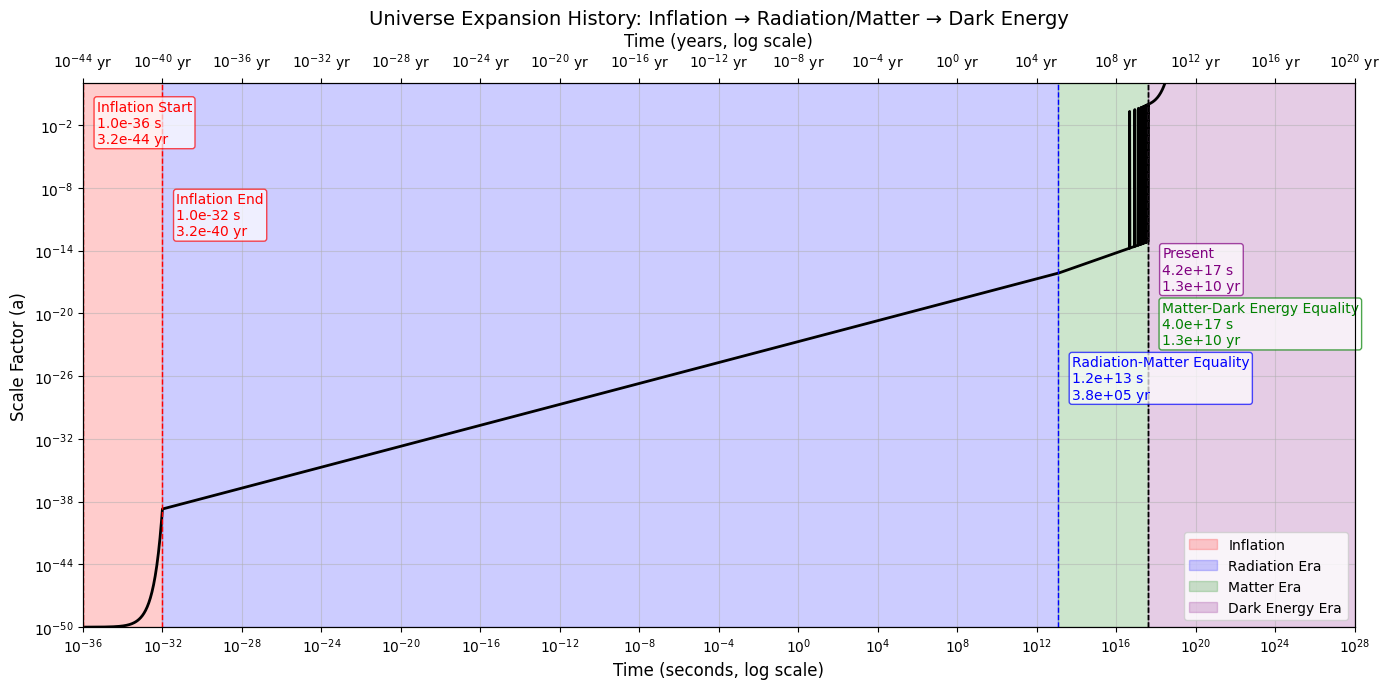

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import LambdaCDM
import astropy.units as u
from matplotlib.ticker import LogLocator, FuncFormatter

# 각 시대의 경계 시간 (초)
t_inflation_start = 1e-36
t_inflation_end = 1e-32
t_rad_end = 1.2e13
t_mat_end = 4e17

# 시간 배열 (log 스케일)
t_inflation = np.logspace(np.log10(t_inflation_start), np.log10(t_inflation_end), 100)
t_rad = np.logspace(np.log10(t_inflation_end), np.log10(t_rad_end), 200)
t_mat = np.logspace(np.log10(t_rad_end), np.log10(t_mat_end), 200)

# ΛCDM 모델 (암흑에너지 시대)
cosmo = LambdaCDM(H0=70*u.km/u.s/u.Mpc, Om0=0.3, Ode0=0.7)
age_univ = cosmo.age(0).to(u.s).value  # 현재 우주 나이 (초)


# 1. 인플레이션: a ∝ exp(H_inf * (t - t_inflation_start))
N_e = 26  # e-folding 수
delta_t_inf = t_inflation_end - t_inflation_start
H_inf = N_e / delta_t_inf
a0 = 1e-50
exp_arg = H_inf * (t_inflation - t_inflation_start)
# 오버플로우 방지: exp_arg가 700 이상이면 np.exp에서 inf 발생
exp_arg = np.clip(exp_arg, None, 700)
a_inf = a0 * np.exp(exp_arg)

# 2. 복사 지배: a ∝ t^{1/2}
a_rad_start = a_inf[-1]
a_rad = a_rad_start * (t_rad / t_inflation_end)**0.5

# 3. 물질 지배: a ∝ t^{2/3}
a_mat_start = a_rad[-1]
t_mat0 = t_rad_end
a_mat = a_mat_start * (t_mat / t_mat0)**(2/3)


# 4. 암흑에너지 지배: ΛCDM 모델 사용 (가로축을 매우 길게 확장)
a_de_start = a_mat[-1]
a_de_cosmo = np.linspace(a_de_start, 100, 1000)
z_de = (1/a_de_cosmo) - 1
valid = (z_de >= 0) & (z_de <= 1000)
a_de_cosmo = a_de_cosmo[valid]
z_de = z_de[valid]
if len(z_de) > 0:
    t_de = cosmo.age(z_de).to(u.s).value
    sort_idx_de = np.argsort(t_de)
    t_de = t_de[sort_idx_de]
    a_de_cosmo = a_de_cosmo[sort_idx_de]
    mask = np.diff(t_de, prepend=t_de[0]) > 0
    t_de = t_de[mask]
    a_de_cosmo = a_de_cosmo[mask]
    if np.isclose(a_mat[-1], a_de_cosmo[0], rtol=1e-8):
        t_de = t_de[1:]
        a_de_cosmo = a_de_cosmo[1:]
    t_de = np.insert(t_de, 0, t_mat_end)
    a_de_cosmo = np.insert(a_de_cosmo, 0, a_mat[-1])
    t_de_future = np.logspace(np.log10(t_de[-1]), np.log10(1e28), 500)
    H0 = cosmo.H0.to(u.s**-1).value
    Omega_L = cosmo.Ode0
    H_L = H0 * np.sqrt(Omega_L)
    exp_arg_future = H_L * (t_de_future - t_de[-1])
    # 오버플로우 방지: exp_arg_future가 700 이상이면 np.exp에서 inf 발생
    exp_arg_future = np.clip(exp_arg_future, None, 700)
    a_de_future = a_de_cosmo[-1] * np.exp(exp_arg_future)
    t_de = np.concatenate([t_de, t_de_future])
    a_de_cosmo = np.concatenate([a_de_cosmo, a_de_future])
else:
    t_de = np.array([])
    a_de_cosmo = np.array([])

# --- 튀는 부분 방지: 경계값 부근에서 중복/불연속 제거 ---
t_mat_mask = t_mat < t_mat_end
t_mat = t_mat[t_mat_mask]
a_mat = a_mat[t_mat_mask]
t_mat = np.append(t_mat, t_mat_end)
a_mat = np.append(a_mat, a_mat_start * (t_mat_end / t_mat0)**(2/3))
if not np.isclose(t_de[0], t_mat_end, rtol=1e-8):
    t_de = np.insert(t_de, 0, t_mat_end)
    a_de_cosmo = np.insert(a_de_cosmo, 0, a_mat[-1])

# 전체 데이터 결합 (중복 제거)
t_total = np.concatenate([t_inflation, t_rad[1:], t_mat[1:], t_de])
a_total = np.concatenate([a_inf, a_rad[1:], a_mat[1:], a_de_cosmo])
sort_idx = np.argsort(t_total)
t_total_sorted = t_total[sort_idx]
a_total_sorted = a_total[sort_idx]
mono_mask = np.diff(t_total_sorted, prepend=t_total_sorted[0]) > 0
t_total_sorted = t_total_sorted[mono_mask]
a_total_sorted = a_total_sorted[mono_mask]

# 보조 x축: 년 단위 표기 함수 (지수 표기 + 단위)
def sec_to_year_exp(x, pos):
    years = x / (3600 * 24 * 365.25)
    if years <= 0:
        return ""
    exp = int(np.floor(np.log10(years)))
    return r"$10^{{{}}}$ yr".format(exp)

# 그래프 그리기
fig, ax = plt.subplots(figsize=(14,7))
ax.loglog(t_total_sorted, a_total_sorted, 'k-', lw=2)
ax.axvspan(t_inflation[0], t_inflation_end, alpha=0.2, color='red', label='Inflation')
ax.axvspan(t_inflation_end, t_rad_end, alpha=0.2, color='blue', label='Radiation Era')
ax.axvspan(t_rad_end, t_mat_end, alpha=0.2, color='green', label='Matter Era')
if len(t_de) > 0:
    ax.axvspan(t_mat_end, t_de[-1], alpha=0.2, color='purple', label='Dark Energy Era')

ax.set_xlabel('Time (seconds, log scale)', fontsize=12)
ax.set_ylabel('Scale Factor (a)', fontsize=12)
ax.set_title('Universe Expansion History: Inflation → Radiation/Matter → Dark Energy', fontsize=14)
ax.legend(loc='lower right')
ax.grid(which='both', alpha=0.5)
ax.set_ylim(1e-50, 100)
ax.set_xlim(t_inflation[0], 1e28)

# 보조 x축 (상단): 년 단위 (지수 표기, 겹치지 않게)
sec_ticks = LogLocator(base=10, subs=(1.0,), numticks=20)
ax.xaxis.set_major_locator(sec_ticks)
ax2 = ax.twiny()
ax2.set_xscale('log')
ax2.set_xlim(ax.get_xlim())
ax2.xaxis.set_major_locator(sec_ticks)
ax2.xaxis.set_major_formatter(FuncFormatter(sec_to_year_exp))
ax2.set_xlabel('Time (years, log scale)', fontsize=12)

# --- 각 시대 경계에 시간(초, 년) 표시 (세로 위치를 규칙적으로 다르게, 실제로 잘 보이게 수정) ---
def annotate_time_manual(ax, t, label, color, y_frac):
    years = t / (3600 * 24 * 365.25)
    y_min, y_max = ax.get_ylim()
    # log축에서 y위치: y = y_min * (y_max/y_min)^y_frac
    y = y_min * (y_max / y_min) ** y_frac
    ax.axvline(t, color=color, linestyle='--', lw=1)
    ax.annotate(
        f"{label}\n{t:.1e} s\n{years:.1e} yr",
        xy=(t, y),
        xytext=(10, 0),
        textcoords='offset points',
        fontsize=10,
        color=color,
        rotation=0,
        va='top',
        ha='left',
        bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.7, edgecolor=color)
    )

# 각 annotation의 y위치(상대적, 0=아래, 1=위) - 겹치지 않게 수동 지정
y_fracs = [0.97, 0.80, 0.5, 0.6, 0.7]

boundaries = [
    (t_inflation_start, "Inflation Start", 'red'),
    (t_inflation_end, "Inflation End", 'red'),
    (t_rad_end, "Radiation-Matter Equality", 'blue'),
    (t_mat_end, "Matter-Dark Energy Equality", 'green'),
    (age_univ, "Present", 'purple')
]

# 반드시 y축 범위 설정 후 annotate 호출!
plt.tight_layout()
plt.draw()  # y축 범위 확정

for (t, label, color), y_frac in zip(boundaries, y_fracs):
    annotate_time_manual(ax, t, label, color, y_frac)

# 현재(Present)에도 세로줄 추가
ax.axvline(age_univ, color='black', linestyle='--', lw=1)

plt.show()